#### Spotify Analytics

#### Conteúdo
* Este é um conjunto de dados completo de todas as paradas "Top 200" e "Viral 50" publicadas globalmente pelo Spotify.

Dataset retirado da Kagle: https://www.kaggle.com/datasets/dhruvildave/spotify-charts

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import normaltest
from scipy.stats import kstest

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Importando Conjunto de Dados
Df = pd.read_csv('Dados/charts.csv')

#### Análise Exploratória dos Dados

In [4]:
# Quantidade de Linhas e Colunas do Conjunto de Dados
Df.shape

(26173514, 9)

In [5]:
# Cabeçalho do Conhunto de Dados
Df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [6]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


### Verificando Valores Ausentes

In [7]:
Df.isnull().sum()

title           11
rank             0
date             0
artist          18
url              0
region           0
chart            0
trend            0
streams    5851610
dtype: int64

In [7]:
# em %
Df.isnull().mean()*100

title       0.000042
rank        0.000000
date        0.000000
artist      0.000069
url         0.000000
region      0.000000
chart       0.000000
trend       0.000000
streams    22.356990
dtype: float64

* A Coluna Streams existem 22,35% de Valores Ausentes, precisamos escolher uma estratégia de tratar Valores Ausentes. Não faremos a exclusão da coluna porque ela é importante para a análise, então usaremos a imputação da média, mediana ou moda. Primeiramente, vamos verificar se os dados seguem uma distribuição normal:

In [37]:
#Calculando a média
round(Df['streams'].mean(),2)

55261.31

In [38]:
# Calculando a Moda
Df['streams'].mode()

0    1002.0
Name: streams, dtype: float64

In [39]:
# Calculando Mediana
Df['streams'].median()

9565.0

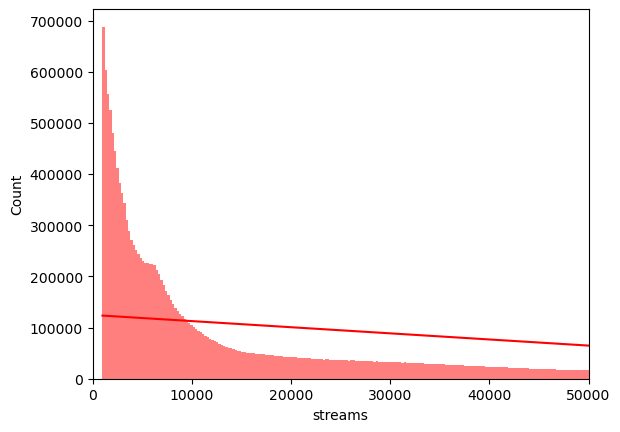

In [15]:
# Plotar o histograma com limite de escala de 50000
sns.histplot(data=Df, x='streams', kde=True, color="red")
plt.xlim(0, 50000)
plt.show()


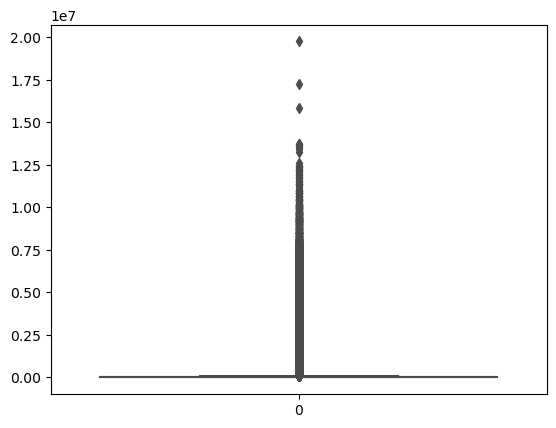

In [25]:
#BoxPlot
sns.boxplot(Df['streams'], color="Blue")
plt.show()

In [24]:
# Teste de Normalidade da Distribuição

# Lista com as variáveis numéricas
numerical_feature = ['streams']

# Loop
for i in numerical_feature:
    
    # Calcula a normalidade
    stats, pval = normaltest(Df[i])
    
     # Checar valor-p
    if pval > 0.05:
        print(i, ': Distribuição Normal')
    else:
        print(i, ': Distribuição Não Normal')

streams : Distribuição Não Normal


In [27]:
# Verificar a quantidade de Outliers:

# Calcular o limite superior e inferior para identificar outliers
Q1 = Df['streams'].quantile(0.25)
Q3 = Df['streams'].quantile(0.75)
IQR = Q3 - Q1

limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Identificar os outliers na coluna 'streams'
outliers = Df[(Df['streams'] < limite_inferior) | (Df['streams'] > limite_superior)]

# Exibir a quantidade de outliers
quantidade_outliers = len(outliers)
print("Quantidade de outliers:", quantidade_outliers)


Quantidade de outliers: 2302153


* Com base na análise dos dados, verifica-se que eles *não seguem uma distribuição normal*. Isso nos impede de utilizar a imputação pela média para tratar os valores ausentes. Nesse caso, temos a opção de escolher entre a imputação pela mediana ou pela moda.

* Para representar os valores centrais da distribuição. Portanto, a imputação pela *mediana* surge como uma alternativa mais robusta nesse contexto.

* Ao escolher a mediana como estratégia de imputação, estaremos utilizando um valor que está no centro da distribuição dos dados, sendo menos sensível à presença de outliers extremos. Isso nos permite preservar a tendência central dos dados e reduzir o impacto desses valores atípicos na imputação dos valores ausentes.

* Assim, ao realizar a imputação pela mediana, estaremos preenchendo os valores faltantes com um ponto de referência que representa uma estimativa mais adequada dos dados, considerando a distribuição e minimizando a influência dos outliers.

* Dessa forma, ao adotar essa abordagem de imputação pela mediana, estaremos tratando os valores ausentes de forma mais robusta e preservando a integridade dos dados para análises subsequentes

In [3]:
# Aplicando a imputação pela mediana
Df['streams'].fillna(9565.0, inplace=True)

In [61]:
# Verificando os valores Ausentes:
Df['streams'].isnull().sum()

0

In [42]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


> O Pandas colocou de modo equivocado as colunas *Streams* como float64 e *date* como object, vamos mudar os tipos de dados:

In [4]:
# Mudar a coluna date para date time
Df['date'] = pd.to_datetime(Df['date'])

In [5]:
# Mudar a coluna streams para int
Df['streams'] = Df['streams'].astype('int64')

In [65]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype         
---  ------   -----         
 0   title    object        
 1   rank     int64         
 2   date     datetime64[ns]
 3   artist   object        
 4   url      object        
 5   region   object        
 6   chart    object        
 7   trend    object        
 8   streams  int64         
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 1.8+ GB


> Removendo Colunas Desnecessárias:

In [6]:
# Remover as colunas 'url' e 'trend'
Df = Df.drop(['url', 'trend'], axis=1)

In [12]:
Df.head()

,title,rank,date,artist,region,chart,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,Argentina,top200,253019
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,Argentina,top200,223988
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,Argentina,top200,210943
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,173865
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,Argentina,top200,153956


### Análise Descritiva dos Dados

In [68]:
# Valores Númericos
Df.describe()

,rank,streams
count,2.617351e+07,2.617351e+07
mean,8.092314e+01,4.504499e+04
std,5.918601e+01,1.856571e+05
min,1.000000e+00,1.001000e+03
25%,2.900000e+01,4.850000e+03
50%,6.700000e+01,9.565000e+03
75%,1.310000e+02,2.489900e+04
max,2.000000e+02,1.974970e+07


In [70]:
#Valores Não númericos
Df.describe(include='object')

,title,artist,region,chart
count,26173503,26173496,26173514,26173514
unique,164806,96156,70,2
top,Shape of You,Ed Sheeran,Argentina,top200
freq,68965,387917,455308,20321904


* Para a coluna "title":
Valor mais frequente (top): "Shape of You" é o título mais frequente na coluna.
Frequência do valor mais frequente (freq): "Shape of You" aparece 68.965 vezes na coluna.
Isso significa que "Shape of You" é o título mais comum presente na coluna "title" e ocorre 68.965 vezes ao longo dos registros.

* Para a coluna "artist":
Valor mais frequente (top): "Ed Sheeran" é o artista mais frequente na coluna.
Frequência do valor mais frequente (freq): "Ed Sheeran" aparece 387.917 vezes na coluna.
Isso indica que "Ed Sheeran" é o artista mais comum presente na coluna "artist" e ocorre 387.917 vezes ao longo dos registros.

* Para a coluna "region":
Valor mais frequente (top): "Argentina" é a região mais frequente na coluna.
Frequência do valor mais frequente (freq): "Argentina" aparece 455.308 vezes na coluna.
Isso indica que "Argentina" é a região mais comum presente na coluna "region" e ocorre 455.308 vezes ao longo dos registros.

* Para a coluna "chart":
Valor mais frequente (top): "top200" é o valor mais frequente na coluna.
Frequência do valor mais frequente (freq): "top200" aparece 20.321.904 vezes na coluna.

In [71]:
# Valores tipo Date time
Df.describe(include='datetime64')

,date
count,26173514
unique,1826
top,2020-12-24 00:00:00
freq,17022
first,2017-01-01 00:00:00
last,2021-12-31 00:00:00


* Analisando os dados, podemos observar que o conjunto abrange um período de tempo entre 2017 e 2021

#### Top 10 artistas por quantidade total de Streams

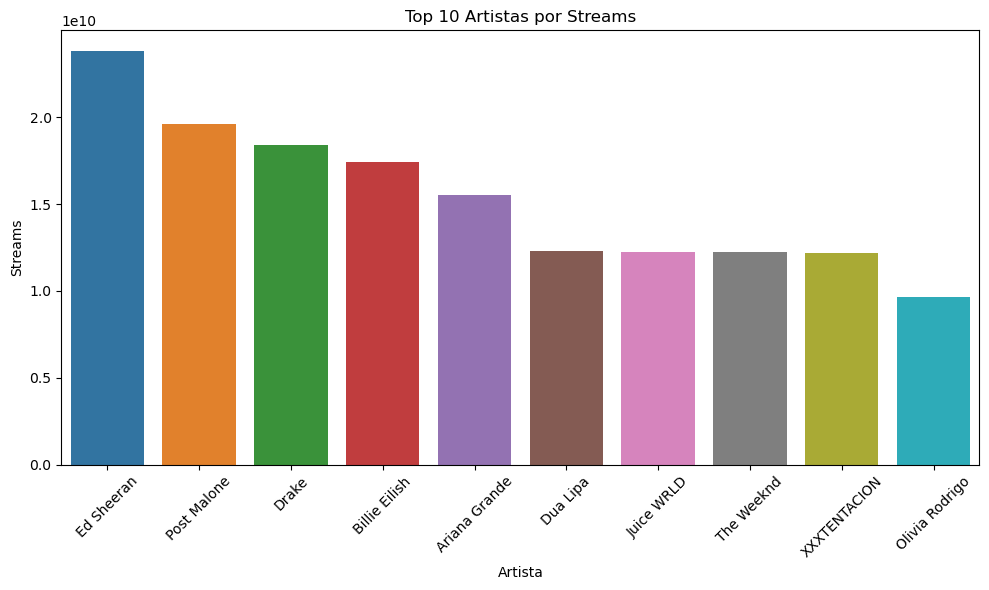

In [80]:
# Agrupar por artista e somar os valores de streams
df_agrupado = Df.groupby('artist')['streams'].sum().reset_index()
df_top_10_artistas = df_agrupado.sort_values(by='streams', ascending=False).head(10)
plt.figure(figsize=(10, 6))  
sns.barplot(x='artist', y='streams', data=df_top_10_artistas)
plt.xlabel('Artista')
plt.ylabel('Streams')
plt.title('Top 10 Artistas por Streams')
plt.xticks(rotation=45) 
plt.tight_layout() 
plt.show()

#### As Regiões com mais Streams

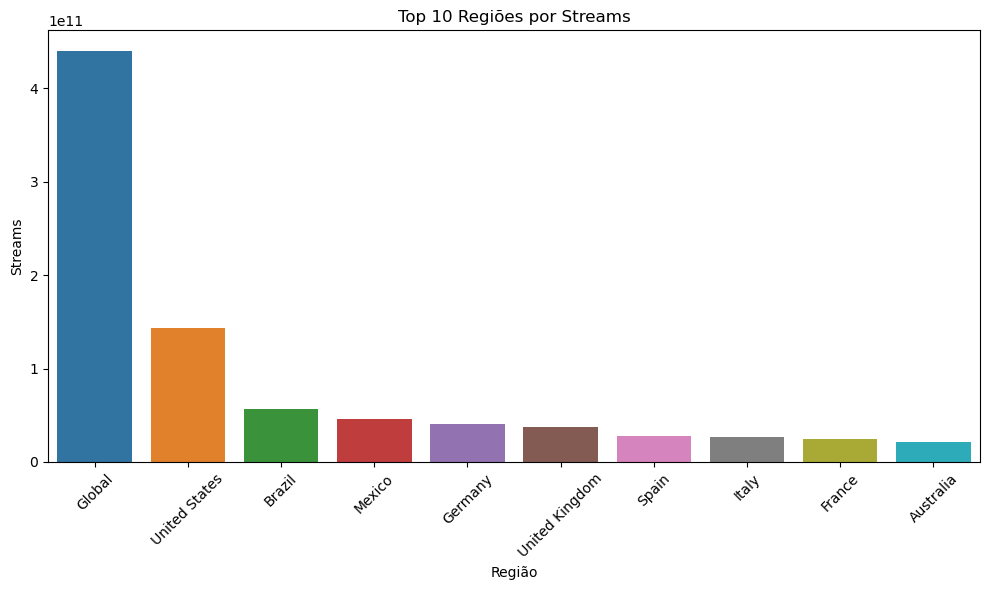

In [82]:
df_agrupado = Df.groupby('region')['streams'].sum().reset_index()
df_top_10_regioes = df_agrupado.sort_values(by='streams', ascending=False).head(10)
plt.figure(figsize=(10, 6)) 
sns.barplot(x=df_top_10_regioes['region'], y=df_top_10_regioes['streams'])
plt.xlabel('Região')
plt.ylabel('Streams')
plt.title('Top 10 Regiões por Streams')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

### Artista com mais Streams em Global

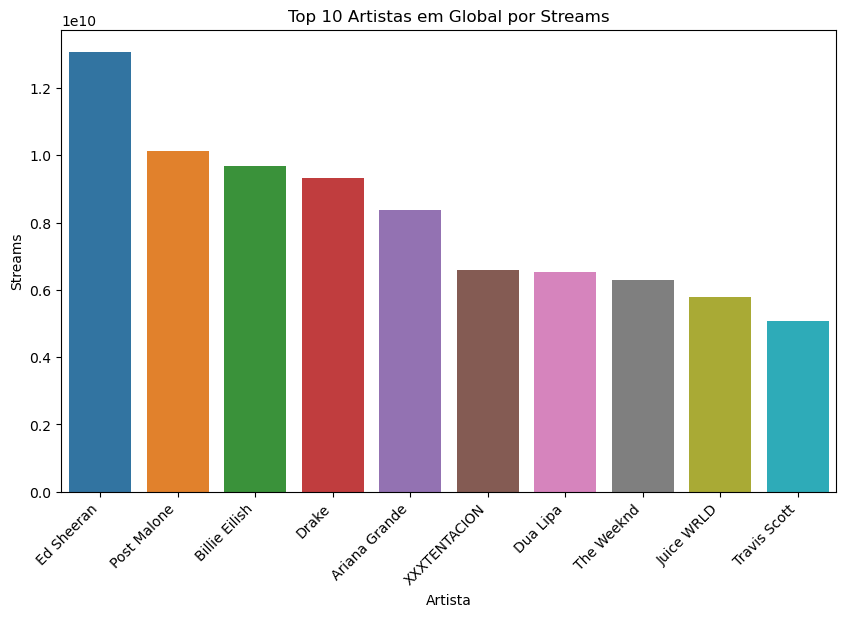

In [7]:
# Filtrar apenas os registros Global
df_gl = Df[Df['region'] == 'Global']
df_agrupado_gl = df_gl.groupby('artist')['streams'].sum().reset_index()
df_top_artistas_gl = df_agrupado_gl.sort_values(by='streams', ascending=False)
df_top_10_artistas_gl = df_top_artistas_gl.head(10)
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x='artist', y='streams', data=df_top_10_artistas_gl)
plt.xlabel('Artista')
plt.ylabel('Streams')
plt.title('Top 10 Artistas em Global por Streams')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### Músicas com mais Streams em Global

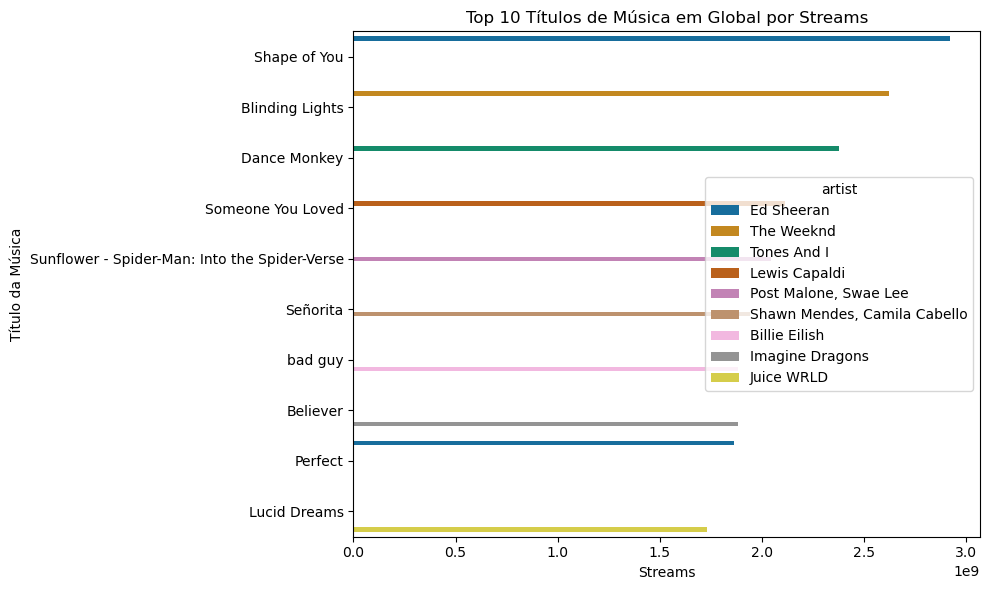

In [8]:
df_gl1 = Df[Df['region'] == 'Global']
df_agrupado_gl1 = df_gl1.groupby(['title', 'artist'])['streams'].sum().reset_index()
df_top_musicas_gl1 = df_agrupado_gl1.sort_values(by='streams', ascending=False)
df_top_10_musicas_gl1 = df_top_musicas_gl1.head(10)
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='streams', y='title', hue='artist', data=df_top_10_musicas_gl1, orient='h', dodge=True, palette='colorblind')
plt.xlabel('Streams')
plt.ylabel('Título da Música')
plt.title('Top 10 Títulos de Música em Global por Streams')
plt.tight_layout()  
plt.show()

### Artistas com mais Streams nos Estados Unidos

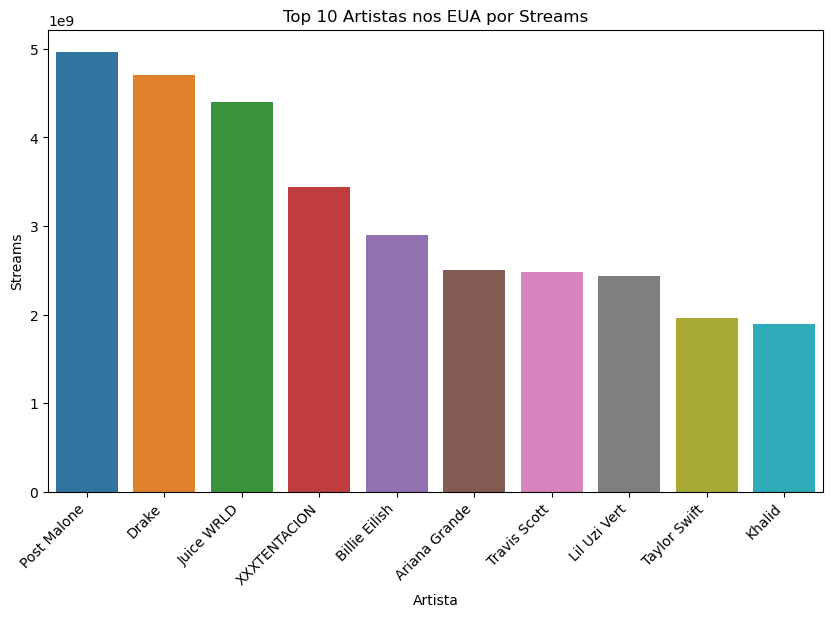

In [108]:
# Filtrar apenas os registros do United States
df_usa = Df[Df['region'] == 'United States']
df_agrupado = df_usa.groupby('artist')['streams'].sum().reset_index()
df_top_artistas_usa = df_agrupado.sort_values(by='streams', ascending=False)
df_top_10_artistas_usa = df_top_artistas_usa.head(10)
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x='artist', y='streams', data=df_top_10_artistas_usa)
plt.xlabel('Artista')
plt.ylabel('Streams')
plt.title('Top 10 Artistas nos EUA por Streams')
plt.xticks(rotation=45, ha='right') 
plt.show()

#### Músicas com mais Streams nos Estados Unidos

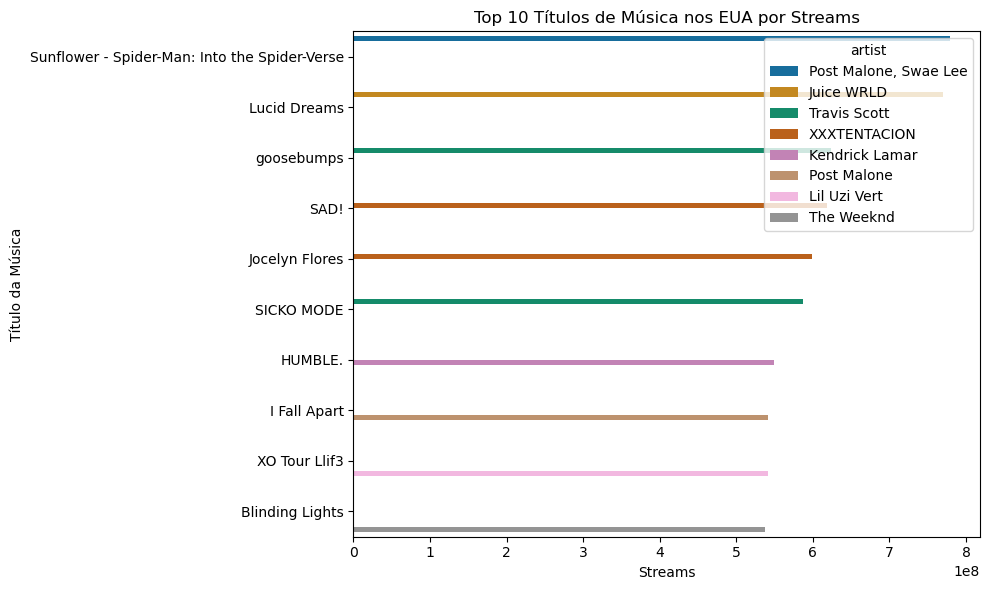

In [13]:
df_usa1 = Df[Df['region'] == 'United States']
df_agrupado1 = df_usa1.groupby(['title', 'artist'])['streams'].sum().reset_index()
df_top_musicas_usa1 = df_agrupado1.sort_values(by='streams', ascending=False)
df_top_10_musicas_usa1 = df_top_musicas_usa1.head(10)
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='streams', y='title', hue='artist', data=df_top_10_musicas_usa1, orient='h', dodge=True, palette='colorblind')
plt.xlabel('Streams')
plt.ylabel('Título da Música')
plt.title('Top 10 Títulos de Música nos EUA por Streams')
plt.tight_layout()  
plt.show()

### Artistas com mais Streams no Brasil

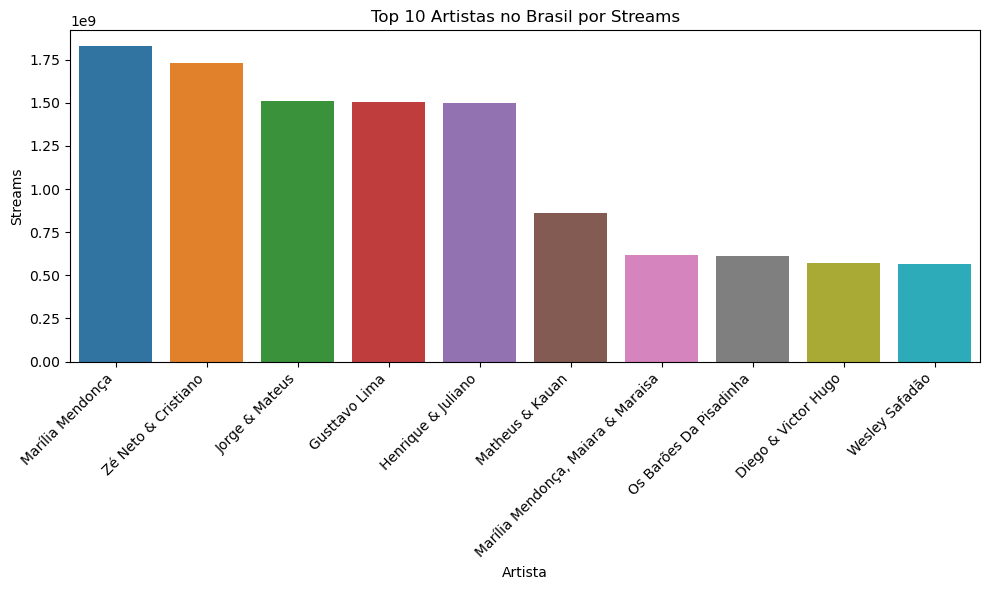

In [96]:
df_brazil = Df[Df['region'] == 'Brazil']
df_agrupado = df_brazil.groupby('artist')['streams'].sum().reset_index()
df_top_artistas_brazil = df_agrupado.sort_values(by='streams', ascending=False)
df_top_10_artistas_brazil = df_top_artistas_brazil.head(10)
plt.figure(figsize=(10, 6))  
ax = sns.barplot(x='artist', y='streams', data=df_top_10_artistas_brazil)
plt.xlabel('Artista')
plt.ylabel('Streams')
plt.title('Top 10 Artistas no Brasil por Streams')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

#### Músicas com mais Streams no Brasil

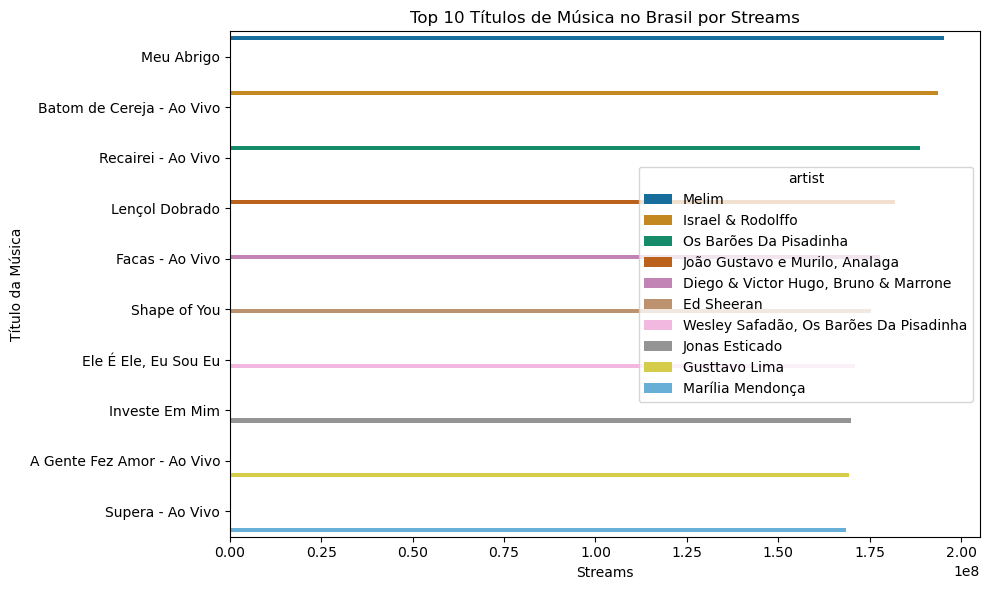

In [110]:
df_brazil = Df[Df['region'] == 'Brazil']
df_agrupado = df_brazil.groupby(['title', 'artist'])['streams'].sum().reset_index()
df_top_musicas_brazil = df_agrupado.sort_values(by='streams', ascending=False)
df_top_10_musicas_brazil = df_top_musicas_brazil.head(10)
plt.figure(figsize=(10, 6)) 
ax = sns.barplot(x='streams', y='title', hue='artist', data=df_top_10_musicas_brazil, orient='h', dodge=True, palette='colorblind')
plt.xlabel('Streams')
plt.ylabel('Título da Música')
plt.title('Top 10 Títulos de Música no Brasil por Streams')
plt.tight_layout()  
plt.show()

### Relatório Final

> Após a análise dos dados, podemos chegar a algumas conclusões importantes:

* Registro até 2021: O conjunto de dados abrange registros até o ano de 2021.

* Imputação pela Mediana: A coluna "streams" apresentava valores ausentes, e a estratégia escolhida para lidar com esses valores foi a imputação pela mediana. Essa abordagem foi selecionada devido à falta de normalidade na distribuição dos dados e à presença de outliers, que poderiam distorcer a imputação pela média.

* Artistas com mais streams: Com base nos dados disponíveis, identificamos que Ed Sheeran foi o artista com o maior número de streams globalmente. Sua música "Shape of You" foi a mais reproduzida. Além disso, Post Malone foi o artista com mais streams nos Estados Unidos, e sua música "Sunflower" foi a mais tocada nessa região. No Brasil, o destaque foi para Marília Mendonça como a artista com mais streams, enquanto a música "Meu Abrigo" do grupo Melim foi a mais reproduzida.